In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/LatihanColab/predictionPricingHouse/all_house_dataset_29112020.csv'
data = pd.read_csv(path , usecols=['name','surfaceArea', 'buildingArea', 'bedroom', 'bathroom', 'carParking', 'price','district'])

In [ ]:
data.columns =['nama_rumah', 'luas_lahan',	'luas_bangunan',	'kmr_tidur',	'kmr_mandi',	'tmp_parkir',	'harga', 'district'] 

In [ ]:
# data.head()

In [ ]:
print(data)

                                             nama_rumah  ...                                           district
0     Perumahan Surya asri Citayam dekat dengan fasi...  ...      Jl. Pandawa Raya, Ragajaya Bojong Gede, Bogor
1                           Dijual rumah beserta isinya  ...  Jl. Raya Kemuning no. 4 Tonjong Raya, Bojong G...
2     Cluster Murah Bebas Biaya - Biaya Akses Dekat ...  ...                                 Bojong Gede, Bogor
3                                     Zahra Townhouse 3  ...  Perumahan Bilabong Desa Cimanggis Kecamatan Bo...
4     Ramai huni! Diskon 30 JUTA! Plus Diskon DP 15 ...  ...      jl. kemuning II bojonggede Bojong Gede, Bogor
...                                                 ...  ...                                                ...
7350  PROMO DP 10 JT TIDAK DIKENAKAN BIAYA LAGI RUMA...  ...                                 Depok, Bojong Gede
7351  Rumah di Bojong Gede dekat stasiun kereta, Boj...  ...                                 Depok, Bojo

In [ ]:
data.drop_duplicates(subset=['nama_rumah', 'luas_lahan',	'luas_bangunan',	'kmr_tidur',	'kmr_mandi',	'tmp_parkir',	'harga', 'district'] , inplace=True)

In [ ]:
data_ = data.drop(columns=['district','nama_rumah'], axis=1)
data_

,luas_lahan,luas_bangunan,kmr_tidur,kmr_mandi,tmp_parkir,harga
0,60,36,2,1,0,335000
1,110,45,2,1,0,595000
2,73,45,2,1,0,425000
3,63,36,2,1,0,346500
4,66,36,2,1,0,418800
...,...,...,...,...,...,...
7040,75,45,2,1,0,360000
7060,80,36,2,1,0,80000
7197,75,45,2,1,0,360000
7198,78,36,2,1,0,55000


In [ ]:
data.describe()

,luas_lahan,luas_bangunan,kmr_tidur,kmr_mandi,tmp_parkir,harga
count,794.000000,794.000000,794.000000,794.000000,794.000000,7.940000e+02
mean,92.206549,54.899244,2.132242,1.154912,0.059194,4.350656e+05
std,164.524130,57.934867,0.648127,0.540825,0.241417,5.727996e+05
min,24.000000,12.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,60.000000,36.000000,2.000000,1.000000,0.000000,2.800000e+05
50%,70.000000,40.000000,2.000000,1.000000,0.000000,3.640000e+05
75%,84.000000,50.000000,2.000000,1.000000,0.000000,4.500000e+05
max,2787.000000,850.000000,8.000000,5.000000,2.000000,9.500000e+06


TAHAP MELAKUKAN CLEANING DATA

---



mencari data dengan value null

---



In [ ]:
data.isnull().sum()

nama_rumah       0
luas_lahan       0
luas_bangunan    0
kmr_tidur        0
kmr_mandi        0
tmp_parkir       0
harga            0
district         0
dtype: int64

In [ ]:
# data = data.fillna(0)
# data.isnull().sum()

memperbaiki data kamar tidur dan kamar mandi jika = 0 maka jadi

---



In [ ]:
data['kmr_tidur']=data['kmr_tidur'].replace(0, 1)
data['kmr_mandi']=data['kmr_mandi'].replace(0, 1)

In [ ]:
data['harga'].describe()

count    7.940000e+02
mean     4.350656e+05
std      5.727996e+05
min      0.000000e+00
25%      2.800000e+05
50%      3.640000e+05
75%      4.500000e+05
max      9.500000e+06
Name: harga, dtype: float64

menghapus baris data jika harga = 0

---



In [ ]:
data.drop(data.index[data['harga'] == 0], inplace = True)
data

,nama_rumah,luas_lahan,luas_bangunan,kmr_tidur,kmr_mandi,tmp_parkir,harga,district
0,Perumahan Surya asri Citayam dekat dengan fasi...,60,36,2,1,0,335000,"Jl. Pandawa Raya, Ragajaya Bojong Gede, Bogor"
1,Dijual rumah beserta isinya,110,45,2,1,0,595000,"Jl. Raya Kemuning no. 4 Tonjong Raya, Bojong G..."
2,Cluster Murah Bebas Biaya - Biaya Akses Dekat ...,73,45,2,1,0,425000,"Bojong Gede, Bogor"
3,Zahra Townhouse 3,63,36,2,1,0,346500,Perumahan Bilabong Desa Cimanggis Kecamatan Bo...
4,Ramai huni! Diskon 30 JUTA! Plus Diskon DP 15 ...,66,36,2,1,0,418800,"jl. kemuning II bojonggede Bojong Gede, Bogor"
...,...,...,...,...,...,...,...,...
7040,rumah mewah lokasi 5 menit kestasiun bojongged...,75,45,2,1,0,360000,"Depok, Bojong Gede"
7060,"Rumah Take Over Bojong Gede, Bojong Gede, Depok",80,36,2,1,0,80000,"Depok, Bojong Gede"
7197,"rumah di citayam, harga promo free kanopi ming...",75,45,2,1,0,360000,"Depok, Bojong Gede"
7198,"Rumah Take Over Kemuning, Bojong Gede, Depok",78,36,2,1,0,55000,"Depok, Bojong Gede"


In [ ]:
data['harga'].describe()

count    7.820000e+02
mean     4.417418e+05
std      5.746196e+05
min      5.000000e+04
25%      2.879000e+05
50%      3.650000e+05
75%      4.500000e+05
max      9.500000e+06
Name: harga, dtype: float64

In [ ]:
data.drop(data.index[data['luas_lahan'] < data['luas_bangunan']], inplace = True)
data

,nama_rumah,luas_lahan,luas_bangunan,kmr_tidur,kmr_mandi,tmp_parkir,harga,district
0,Perumahan Surya asri Citayam dekat dengan fasi...,60,36,2,1,0,335000,"Jl. Pandawa Raya, Ragajaya Bojong Gede, Bogor"
1,Dijual rumah beserta isinya,110,45,2,1,0,595000,"Jl. Raya Kemuning no. 4 Tonjong Raya, Bojong G..."
2,Cluster Murah Bebas Biaya - Biaya Akses Dekat ...,73,45,2,1,0,425000,"Bojong Gede, Bogor"
3,Zahra Townhouse 3,63,36,2,1,0,346500,Perumahan Bilabong Desa Cimanggis Kecamatan Bo...
4,Ramai huni! Diskon 30 JUTA! Plus Diskon DP 15 ...,66,36,2,1,0,418800,"jl. kemuning II bojonggede Bojong Gede, Bogor"
...,...,...,...,...,...,...,...,...
7040,rumah mewah lokasi 5 menit kestasiun bojongged...,75,45,2,1,0,360000,"Depok, Bojong Gede"
7060,"Rumah Take Over Bojong Gede, Bojong Gede, Depok",80,36,2,1,0,80000,"Depok, Bojong Gede"
7197,"rumah di citayam, harga promo free kanopi ming...",75,45,2,1,0,360000,"Depok, Bojong Gede"
7198,"Rumah Take Over Kemuning, Bojong Gede, Depok",78,36,2,1,0,55000,"Depok, Bojong Gede"


In [ ]:
data.drop(data.index[data['luas_lahan'] > 1000], inplace = True)
data

,nama_rumah,luas_lahan,luas_bangunan,kmr_tidur,kmr_mandi,tmp_parkir,harga,district
0,Perumahan Surya asri Citayam dekat dengan fasi...,60,36,2,1,0,335000,"Jl. Pandawa Raya, Ragajaya Bojong Gede, Bogor"
1,Dijual rumah beserta isinya,110,45,2,1,0,595000,"Jl. Raya Kemuning no. 4 Tonjong Raya, Bojong G..."
2,Cluster Murah Bebas Biaya - Biaya Akses Dekat ...,73,45,2,1,0,425000,"Bojong Gede, Bogor"
3,Zahra Townhouse 3,63,36,2,1,0,346500,Perumahan Bilabong Desa Cimanggis Kecamatan Bo...
4,Ramai huni! Diskon 30 JUTA! Plus Diskon DP 15 ...,66,36,2,1,0,418800,"jl. kemuning II bojonggede Bojong Gede, Bogor"
...,...,...,...,...,...,...,...,...
7040,rumah mewah lokasi 5 menit kestasiun bojongged...,75,45,2,1,0,360000,"Depok, Bojong Gede"
7060,"Rumah Take Over Bojong Gede, Bojong Gede, Depok",80,36,2,1,0,80000,"Depok, Bojong Gede"
7197,"rumah di citayam, harga promo free kanopi ming...",75,45,2,1,0,360000,"Depok, Bojong Gede"
7198,"Rumah Take Over Kemuning, Bojong Gede, Depok",78,36,2,1,0,55000,"Depok, Bojong Gede"


In [ ]:
data.drop(data.index[data['luas_lahan'] <= 60], inplace = True)
data

,nama_rumah,luas_lahan,luas_bangunan,kmr_tidur,kmr_mandi,tmp_parkir,harga,district
1,Dijual rumah beserta isinya,110,45,2,1,0,595000,"Jl. Raya Kemuning no. 4 Tonjong Raya, Bojong G..."
2,Cluster Murah Bebas Biaya - Biaya Akses Dekat ...,73,45,2,1,0,425000,"Bojong Gede, Bogor"
3,Zahra Townhouse 3,63,36,2,1,0,346500,Perumahan Bilabong Desa Cimanggis Kecamatan Bo...
4,Ramai huni! Diskon 30 JUTA! Plus Diskon DP 15 ...,66,36,2,1,0,418800,"jl. kemuning II bojonggede Bojong Gede, Bogor"
6,Rumah Tahan Gempa Hingga 7Sr Pertama Di Indone...,84,36,2,1,0,595000,"Lingkar LIPI Bojong Gede, Bogor"
...,...,...,...,...,...,...,...,...
6889,"rumah diperumahan pesona citayam, Bojong Gede,...",120,50,2,1,0,515000,"Depok, Bojong Gede"
7040,rumah mewah lokasi 5 menit kestasiun bojongged...,75,45,2,1,0,360000,"Depok, Bojong Gede"
7060,"Rumah Take Over Bojong Gede, Bojong Gede, Depok",80,36,2,1,0,80000,"Depok, Bojong Gede"
7197,"rumah di citayam, harga promo free kanopi ming...",75,45,2,1,0,360000,"Depok, Bojong Gede"


In [ ]:
data.describe()

,luas_lahan,luas_bangunan,kmr_tidur,kmr_mandi,tmp_parkir,harga
count,481.000000,481.000000,481.000000,481.000000,481.000000,4.810000e+02
mean,95.180873,56.162162,2.174636,1.170478,0.076923,4.815726e+05
std,67.156553,55.378496,0.583328,0.504192,0.274446,5.217905e+05
min,61.000000,27.000000,1.000000,1.000000,0.000000,5.000000e+04
25%,71.000000,36.000000,2.000000,1.000000,0.000000,3.500000e+05
50%,75.000000,43.000000,2.000000,1.000000,0.000000,3.980000e+05
75%,90.000000,54.000000,2.000000,1.000000,0.000000,4.800000e+05
max,850.000000,850.000000,6.000000,5.000000,2.000000,9.000000e+06




---



In [ ]:
# data['kmr_tidur'].value_counts().plot(kind='bar')
# plt.title('Jumlah kamar tidur')
# plt.xlabel('kmr_tidur')
# plt.ylabel('Jumlah')
# sns.despine

In [ ]:
# chart = plt.figure(figsize=(12,4))
# chart.add_subplot(1,2,1)
# sns.countplot(data['kmr_tidur'])
# plt.title('Jumlah kamar tidur')

In [ ]:
# data['kmr_mandi'].value_counts().plot(kind='bar')
# plt.title('Jumlah kamar mandi')
# plt.xlabel('kmr_mandi')
# plt.ylabel('Jumlah')
# sns.despine

In [ ]:
# chart = plt.figure(figsize=(12,4))
# chart.add_subplot(1,2,1)
# sns.countplot(data['kmr_mandi'])
# plt.title('Jumlah kamar mandi')

In [ ]:
# plt.figure(figsize=(25,4))
# data['luas_lahan'].value_counts().plot(kind='bar')
# plt.title('Jumlah luas lahan')
# plt.xlabel('luas_lahan')
# plt.ylabel('Jumlah')
# sns.despine

In [ ]:
# chart = plt.figure(figsize=(69,4))
# chart.add_subplot(1,2,1)
# sns.countplot(data['luas_lahan'])
# plt.title('jumlah luas lahan')

In [ ]:
# plt.figure(figsize=(25,4))
# data['luas_bangunan'].value_counts().plot(kind='bar')
# plt.title('Jumlah luas bangunan')
# plt.xlabel('luas_bangunan')
# plt.ylabel('jumlah')
# sns.despine

In [ ]:
# chart = plt.figure(figsize=(69,4))
# chart.add_subplot(1,2,1)
# sns.countplot(data['luas_bangunan'])
# plt.title('jumlah luas bangunan')

In [ ]:
# plt.figure(figsize=(25,5))
# sns.pairplot(data=data, x_vars=['luas_lahan', 'luas_bangunan', 'kmr_tidur', 'kmr_mandi', 'tmp_parkir'], y_vars=['harga'], height=5, aspect=1)

In [ ]:
# plt.scatter(data.harga, data.luas_lahan)
# plt.title('harga vs luas lahan')

In [ ]:
# plt.scatter(data.harga, data.luas_bangunan)
# plt.title('harga vs luas bangunan')

In [ ]:
# plt.scatter(data.kmr_tidur, data.harga)
# plt.title('harga dan kamar tidur')
# plt.xlabel('kmr_tidur')
# plt.ylabel('harga')
# plt.show()
# # sns.despinee

In [ ]:
# plt.scatter(data['kmr_mandi'], data.harga)
# plt.title('kamar mandi dan harga')
# plt.xlabel('kamar mandi')
# plt.ylabel('harga')
# plt.show()
# # sns.despinee

In [ ]:
# plt.scatter(data['harga'], (data['luas_lahan'] + data['luas_bangunan']))

In [ ]:
# correlation(data, 'price', 'surfaceArea')

In [ ]:
data.corr().style.background_gradient().set_precision(2)

,luas_lahan,luas_bangunan,kmr_tidur,kmr_mandi,tmp_parkir,harga
luas_lahan,1.00,0.88,0.61,0.64,-0.06,0.77
luas_bangunan,0.88,1.00,0.66,0.68,-0.05,0.83
kmr_tidur,0.61,0.66,1.00,0.75,-0.07,0.57
kmr_mandi,0.64,0.68,0.75,1.00,-0.03,0.61
tmp_parkir,-0.06,-0.05,-0.07,-0.03,1.00,-0.00
harga,0.77,0.83,0.57,0.61,-0.00,1.00


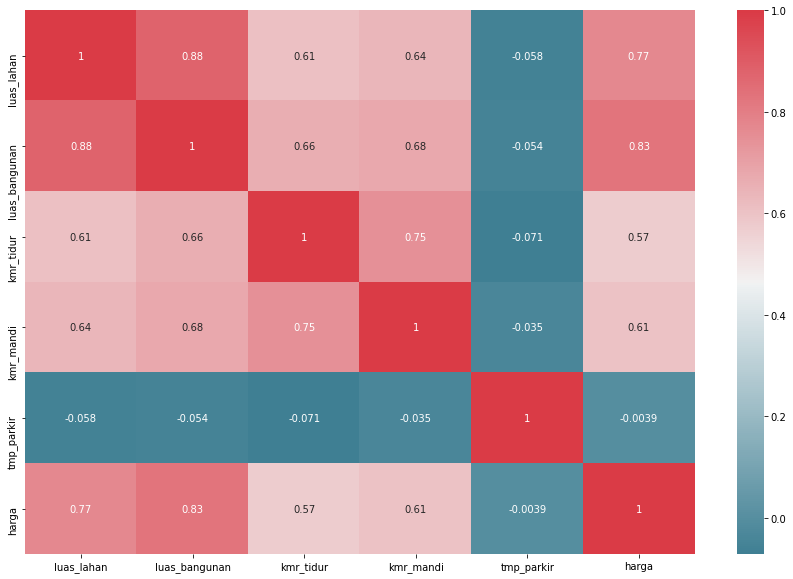

In [ ]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score #,mean_squared_error 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
train_data, test_data = train_test_split(data, train_size=0.9, random_state=1)

train_size=0.8, random_state=3 => predict=0.88

train_size=0.7, random_state=3 => predict=0.80

train_size=0.6, random_state=3 => predict=0.79

train_size=0.5, random_state=3 => predict=0.79

train_size=0.4, random_state=3 => predict=0.64

train_size=0.3, random_state=3 => predict=0.60

train_size=0.3, random_state=2 => predict=0.64

train_size=0.4, random_state=2 => predict=0.69

In [ ]:
reg = LinearRegression() 

In [ ]:
# x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['harga']).reshape(-1,1)

In [ ]:
features1=['luas_lahan','luas_bangunan','kmr_tidur','kmr_mandi', 'tmp_parkir']
reg.fit(train_data[features1],train_data['harga'])
pred=reg.predict(test_data[features1])
score = reg.score(test_data[features1],test_data['harga'])
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Prediction',score)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
# print('Root mean squared error(RMSE)', round(np.sqrt(mean_squared_error(,pred)),2))
print('R squared training',reg.score(train_data[features1],train_data['harga']))
print('R squared testing', reg.score(test_data[features1],test_data['harga']))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred))

Prediction 0.5945467382080698
mean squared error(MSE) 812005.33
R squared training 0.5247054646387448
R squared testing 0.5945467382080698
Intercept:  -199117.44825754483
Coefficient: [  2021.14901016   1220.03406835 161019.84983447  38752.52570279
  78180.65344421]
Coefficient of determination: 0.59
